In [1]:
#Experiment 2: Gaussian Curve Fitting

In [2]:
#To execute the code, execute all cells and then run the main() function call provided in the last cell

In [3]:
import os
import random
import warnings
from scipy.optimize import OptimizeWarning

from pandas import read_csv
from matplotlib import pyplot
from numpy import arange
from scipy.optimize import curve_fit
from numpy import asarray as ar,exp, linspace, random
import numpy as np

In [4]:
def gaussian(x,a,x0,sigma):
    # return gaussian estimate for given x
    return a*exp(-(x-x0)**2/(2*sigma**2))

In [5]:
# Function to generate points for Gaussian distribution
def generate_points(number_of_points = 20):
    x_mean = random.randint(10,20)
    y_mean = random.randint(4,10)
    coord = [[x_mean, y_mean]]
    x_coord, y_coord = [], []
    for i in range(1,number_of_points//2):
        coord.append([x_mean-i, y_mean-i])
        coord.append([x_mean+i, y_mean-i])
    coord.sort()
    x_coord = [i[0] for i in coord]
    y_coord = [i[1] for i in coord]
    return x_coord, y_coord

In [6]:
def main(number_of_points):
    # get points for gaussian fitting
    x, y = generate_points(number_of_points)
    x,y = ar(x), ar(y)
    mean = sum(x * y) / sum(y)
    
    with warnings.catch_warnings():
        warnings.filterwarnings('error')
        try:
            sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
        except Exception as e:
            print('error found:', e)
            return 0
    
    f = [max(y),mean,sigma]
    popt,pcov = curve_fit(gaussian,x,y,p0=f, maxfev=800)
    y_line=gaussian(x,*popt)

    if all(int(i)==int(y_line[0]) for i in y_line):
        print("Covariance couldn't be estimated.")
        return 0
    
    # plot graph
    pyplot.scatter(x,y)
    pyplot.plot(x,y,'o', color='blue', label='data')
    n = len(x)
    pyplot.plot(x, y_line,'--', color='red', label='gaussian')
    
    pyplot.legend(loc="upper right")
    return 1

Attempt 1:
error found: invalid value encountered in sqrt
Attempt 2:


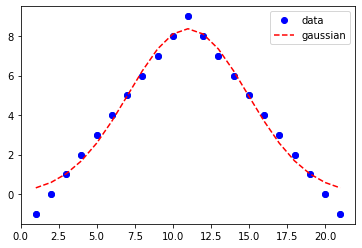

In [7]:
# passing the number of points as parameter to main() function
i, done = 0,0
while not done:
    print(f"Attempt {i+1}:")
    i+=1
    done = main(22)